In [1]:
# Loading necessary libraries
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt
import json

In [2]:
#load data
df = pd.read_json('intents.json', orient='columns')
df2 = pd.read_json('intents.json', orient='columns')
df3 = pd.read_json('intents.json', orient='columns')

In [3]:
#delete unecesseary columns
df = df.drop(columns=['context_set'])
df2 = df2.drop(columns=['context_set'])
df3 = df3.drop(columns=['context_set'])

In [4]:
##delete unecesseary columns
df =df.drop(columns=['tag'])
df2 =df2.drop(columns=['tag'])
df3 =df3.drop(columns=['tag'])

In [5]:
df3

,patterns,responses
0,"[Hi there, Is anyone there?, Hey, Hola, Hello,...","[Hello, I'm sure you will love this course, Ha..."
1,"[What is your name?, what are you?, who are yo...","[Hi, I'm BoTrainer, I'm BoTrainer , Call me B..."
2,"[Bye, See you later, Goodbye, Nice chatting to...","[Have a lovely day!, Have a nice studying time..."
3,"[Thanks, Thank you, That's helpful, Awesome, t...","[Happy to help!, Any time!, My pleasure, Do en..."
4,"[How can you help me?, What can you do?, What ...",[I can answer your questions and clear your mi...
...,...,...
66,"[what is a html entity, what are html entities...","[In HTML some characters are reserved like ,<,..."
67,"[what does an <abbr> tag do, what is <abbr>, t...",[Defines an abbreviation or acronym]
68,"[how do you set the size of a column, how can ...","[<table style=""width:100%"">]"
69,"[how do i change the height of a row, tell me ...","[<tr style=""height:200px"">]"


In [6]:
# get the first pattern
for i in df.index:
    df['patterns'][i]= df['patterns'][i][0]
    df['responses'][i]= df['responses'][i][0]

In [7]:
df

,patterns,responses
0,Hi there,"Hello, I'm sure you will love this course"
1,What is your name?,"Hi, I'm BoTrainer"
2,Bye,Have a lovely day!
3,Thanks,Happy to help!
4,How can you help me?,I can answer your questions and clear your mis...
...,...,...
66,what is a html entity,"In HTML some characters are reserved like ,<,>..."
67,what does an <abbr> tag do,Defines an abbreviation or acronym
68,how do you set the size of a column,"<table style=""width:100%"">"
69,how do i change the height of a row,"<tr style=""height:200px"">"


In [8]:
# get a second pattern
for i in df2.index:
    df2['patterns'][i]= df2['patterns'][i][1]
    df2['responses'][i]= df2['responses'][i][0]

In [9]:
df2

,patterns,responses
0,Is anyone there?,"Hello, I'm sure you will love this course"
1,what are you?,"Hi, I'm BoTrainer"
2,See you later,Have a lovely day!
3,Thank you,Happy to help!
4,What can you do?,I can answer your questions and clear your mis...
...,...,...
66,what are html entities,"In HTML some characters are reserved like ,<,>..."
67,what is <abbr>,Defines an abbreviation or acronym
68,how can i set the size of a column,"<table style=""width:100%"">"
69,tell me how to change the height of a row,"<tr style=""height:200px"">"


In [10]:
# get a third pattern
for i in df3.index:
    df3['patterns'][i]= df3['patterns'][i][2]
    df3['responses'][i]= df3['responses'][i][0]

In [11]:
df3

,patterns,responses
0,Hey,"Hello, I'm sure you will love this course"
1,who are you?,"Hi, I'm BoTrainer"
2,Goodbye,Have a lovely day!
3,That's helpful,Happy to help!
4,What help you provide?,I can answer your questions and clear your mis...
...,...,...
66,explain html entities,"In HTML some characters are reserved like ,<,>..."
67,tell me about the <abbr> tag,Defines an abbreviation or acronym
68,how do i set the size of a column,"<table style=""width:100%"">"
69,how do i set the height of a row,"<tr style=""height:200px"">"


In [12]:
# regroup all patterns in a singal dataset
resultFinal = pd.concat([df, df2,df3], axis=0,ignore_index=True)

In [13]:
df = resultFinal

In [14]:
df

,patterns,responses
0,Hi there,"Hello, I'm sure you will love this course"
1,What is your name?,"Hi, I'm BoTrainer"
2,Bye,Have a lovely day!
3,Thanks,Happy to help!
4,How can you help me?,I can answer your questions and clear your mis...
...,...,...
208,explain html entities,"In HTML some characters are reserved like ,<,>..."
209,tell me about the <abbr> tag,Defines an abbreviation or acronym
210,how do i set the size of a column,"<table style=""width:100%"">"
211,how do i set the height of a row,"<tr style=""height:200px"">"


In [15]:
# rename patterns and responses to Query and Response
df.rename(columns = {'patterns':'Query', 'responses':'Response'}, inplace = True)

## Data Understanding

In [16]:
df.shape
# There are 3724 rows and 2 columns in our dataset

(213, 2)

In [17]:
df.columns
# Displaying the names of columns present in the dataset

Index(['Query', 'Response'], dtype='object')

In [18]:
df.info()
# Checking information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     213 non-null    object
 1   Response  213 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


In [19]:
df.describe()
# Describe function shows us the frequency,unique and counts of all columns

,Query,Response
count,213,213
unique,213,71
top,how can i add a video file,increases the font size of the text by one unit
freq,1,3


In [20]:
df.nunique()
# nunique() function return number of unique elements in the object. 

Query       213
Response     71
dtype: int64

In [21]:
df.isnull().sum()
# Checking for the presence of null values in the data. As we can see there are no null values present in the data

Query       0
Response    0
dtype: int64

In [22]:
df['Query'].value_counts()
# Checking the counts of the values present in the column 'Query'

how can i add a video file                             1
what does < datalist > do                              1
how do i create a web form                             1
what does < mark > do                                  1
how can you add a cell to a table                      1
                                                      ..
how do i resize my image                               1
what is a marquee                                      1
what does < legend > do                                1
how to add a javascript zone in html                   1
tell me the difference between an element and a tag    1
Name: Query, Length: 213, dtype: int64

In [23]:
df['Response'].value_counts()
# Checking the counts of the values present in the column 'Response'

increases the font size of the text by one unit                                                                                                                                                                                                                    3
with the required attribute                                                                                                                                                                                                                                        3
<datalist> when used along with the <input> tag provides a suggestion that the user selects one of the options given or can enter some entirely different value                                                                                                    3
The <dl> tag defines the description list                                                                                                                                                                                

## Data Visualization

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [25]:
Text=df['Query']

In [26]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

Hi there
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
What is your name?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
Bye
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
Thanks
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.4404, 
How can you help me?
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
what do we call an element without a closing tag
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what do you call an element that have a closing tag 
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what is the difference between a closing and an opening tag
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how do i tag an image
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how can i create a line break
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
how do you create a header
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
how do i add background color to a web page
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how to use bold text
neg: 0.0, neu: 0.606, pos: 0.394, compound: 0.3818, 
how d

In [27]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [28]:
df

,Query,Response,neg,neu,pos,compound
0,Hi there,"Hello, I'm sure you will love this course",0.0,1.000,0.000,0.0000
1,What is your name?,"Hi, I'm BoTrainer",0.0,1.000,0.000,0.0000
2,Bye,Have a lovely day!,0.0,1.000,0.000,0.0000
3,Thanks,Happy to help!,0.0,0.000,1.000,0.4404
4,How can you help me?,I can answer your questions and clear your mis...,0.0,0.597,0.403,0.4019
...,...,...,...,...,...,...
208,explain html entities,"In HTML some characters are reserved like ,<,>...",0.0,1.000,0.000,0.0000
209,tell me about the <abbr> tag,Defines an abbreviation or acronym,0.0,1.000,0.000,0.0000
210,how do i set the size of a column,"<table style=""width:100%"">",0.0,1.000,0.000,0.0000
211,how do i set the height of a row,"<tr style=""height:200px"">",0.0,1.000,0.000,0.0000


In [29]:
from wordcloud import WordCloud
# importing word cloud

In [30]:
#display the words that are repeating and have the highest frequency
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud    

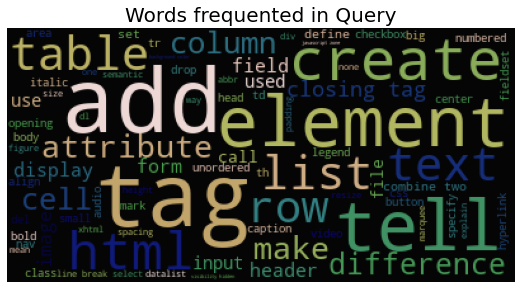

In [31]:
wordcloud(df,'Query')
# top words in the query column

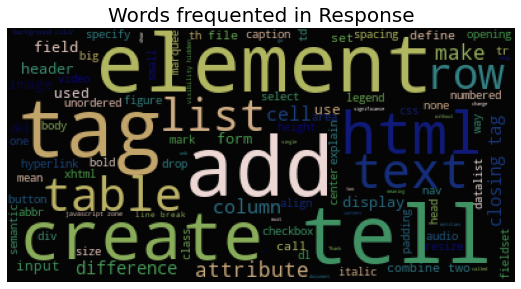

In [32]:
wordcloud(df,'Response')
# top words in the response column

## Text-Normalization

In [33]:
# Removing special characters

In [34]:
import re
# importing regular expressions

In [35]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion

In [36]:
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value

In [37]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters

In [38]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values

In [39]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column

In [40]:
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on response column

In [41]:
df
# final cleaned dataset

,Query,Response,neg,neu,pos,compound
0,hi there,hello i m sure you will love this course,0.0,1.000,0.000,0.0000
1,what is your name,hi i m botrainer,0.0,1.000,0.000,0.0000
2,bye,have a lovely day,0.0,1.000,0.000,0.0000
3,thanks,happy to help,0.0,0.000,1.000,0.4404
4,how can you help me,i can answer your questions and clear your mis...,0.0,0.597,0.403,0.4019
...,...,...,...,...,...,...
208,explain html entities,in html some characters are reserved like ...,0.0,1.000,0.000,0.0000
209,tell me about the abbr tag,defines an abbreviation or acronym,0.0,1.000,0.000,0.0000
210,how do i set the size of a column,table style width,0.0,1.000,0.000,0.0000
211,how do i set the height of a row,tr style height,0.0,1.000,0.000,0.0000


In [42]:
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset

In [43]:
df

,Query,Response,neg,neu,pos,compound
0,hi there,hello i m sure you will love this course,0.0,1.000,0.000,0.0000
1,what is your name,hi i m botrainer,0.0,1.000,0.000,0.0000
2,bye,have a lovely day,0.0,1.000,0.000,0.0000
3,thanks,happy to help,0.0,0.000,1.000,0.4404
4,how can you help me,i can answer your questions and clear your mis...,0.0,0.597,0.403,0.4019
5,what do we call an element without a closing tag,empty element,0.0,1.000,0.000,0.0000
6,what do you call an element that have a closin...,closing element,0.0,1.000,0.000,0.0000
7,what is the difference between a closing and a...,closing tag has a in front,0.0,1.000,0.000,0.0000
8,how do i tag an image,img src image gif alt myimage,0.0,1.000,0.000,0.0000
9,how can i create a line break,with the br tag,0.0,0.656,0.344,0.2732


### Important Sentence

In [44]:
imp_sent=df.sort_values(by='compound', ascending=False)
# arranging the compound column in descending order to find the best sentence. 

In [45]:
imp_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
150,tell me the best way to tag an image,img src image gif alt myimage,0.0,0.656,0.344,0.6369
3,thanks,happy to help,0.0,0.000,1.000,0.4404
145,that s helpful,happy to help,0.0,0.263,0.737,0.4215
49,tell me the easiest way to club two rows together,rowspan th rowspan name th,0.0,0.763,0.237,0.4215
4,how can you help me,i can answer your questions and clear your mis...,0.0,0.597,0.403,0.4019


### Top Positive Sentence

In [46]:
pos_sent=df.sort_values(by='pos', ascending=False)
# Arranging the dataframe by positive column in descending order to find the best postive sentence.

In [47]:
pos_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
3,thanks,happy to help,0.0,0.000,1.000,0.4404
145,that s helpful,happy to help,0.0,0.263,0.737,0.4215
74,thank you,happy to help,0.0,0.286,0.714,0.3612
146,what help you provide,i can answer your questions and clear your mis...,0.0,0.526,0.474,0.4019
85,how can i create a hyperlink,a href http www example com name a,0.0,0.588,0.412,0.2732


### Top Negative Sentence

In [48]:
neg_sent=df.sort_values(by='neg', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [49]:
neg_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
0,hi there,hello i m sure you will love this course,0.0,1.0,0.0,0.0
134,is there a difference between tags and elements,the element is an individual component of the ...,0.0,1.0,0.0,0.0
136,show the differences between html and xhtml,the differences between html and xhtml are h...,0.0,1.0,0.0,0.0
137,what are html entities,in html some characters are reserved like ...,0.0,1.0,0.0,0.0
138,what is abbr,defines an abbreviation or acronym,0.0,1.0,0.0,0.0


### Top Neutral Sentence

In [50]:
neu_sent=df.sort_values(by='neu', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best neutral sentence.

In [51]:
neu_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
0,hi there,hello i m sure you will love this course,0.0,1.0,0.0,0.0
138,what is abbr,defines an abbreviation or acronym,0.0,1.0,0.0,0.0
128,what does select do,in the case of select tag a user will have ...,0.0,1.0,0.0,0.0
129,what does datalist do,datalist when used along with the input ta...,0.0,1.0,0.0,0.0
130,can you list the semantic elements,semantic elements are those which describe the...,0.0,1.0,0.0,0.0


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
# importing tfidf vectorizer

In [53]:
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF

In [54]:
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array

In [55]:
tfidf.get_feature_names()
# displaying feature names

['abbr',
 'about',
 'add',
 'align',
 'an',
 'and',
 'anyone',
 'are',
 'area',
 'attribute',
 'audio',
 'background',
 'be',
 'best',
 'between',
 'big',
 'body',
 'bold',
 'break',
 'button',
 'bye',
 'call',
 'called',
 'can',
 'caption',
 'cell',
 'cells',
 'center',
 'change',
 'checkbox',
 'class',
 'closing',
 'club',
 'code',
 'color',
 'column',
 'columns',
 'combine',
 'contain',
 'content',
 'create',
 'css',
 'datalist',
 'define',
 'del',
 'difference',
 'differences',
 'different',
 'display',
 'div',
 'dl',
 'do',
 'document',
 'does',
 'down',
 'drop',
 'easiest',
 'element',
 'elements',
 'entities',
 'entity',
 'explain',
 'field',
 'fieldset',
 'figure',
 'file',
 'fill',
 'filled',
 'for',
 'form',
 'forms',
 'go',
 'goes',
 'goodbye',
 'happens',
 'has',
 'have',
 'head',
 'header',
 'headers',
 'height',
 'help',
 'helpful',
 'hey',
 'hi',
 'hidden',
 'how',
 'html',
 'hyperlink',
 'if',
 'image',
 'in',
 'input',
 'into',
 'is',
 'it',
 'italic',
 'italics',
 'ja

# Application

In [56]:
from sklearn.metrics.pairwise import cosine_distances

In [57]:
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = nu.lemmatization_sentence(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [ ]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: # 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])

USER: hi
logs:
 Matched Question: 'hi there'
 Confidence Score: 75.15 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  hello  i m sure you will love this course
USER: how to tag an image
logs:
 Matched Question: 'how do i tag an image'
 Confidence Score: 85.66 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:   img src  image gif  alt  myimage   
USER: how to add image
logs:
 Matched Question: 'how do i tag an image'
 Confidence Score: 52.83 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:   img src  image gif  alt  myimage   
